In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [2]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [3]:
#assign a star a random value from the fluxes 
cluster_flux=[]
star=[]
cluster_size=1000
for i in range(cluster_size):
    cluster_flux.append(random.choice(flux_new))
    star.append(i)

In [4]:
#convert flux to mag
cluster_mag=[]
for i in range(len(cluster_flux)):
    mag=-2.5*np.log10(cluster_flux[i])
    cluster_mag.append(mag)

In [5]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
t=250 #yrs
cadence=2
steps=t*cadence
burst_prob=1e-4/cadence
burst=np.ones((cluster_size,steps))
L=np.zeros((cluster_size,steps))

In [6]:
#set up a loop that sets the star that bursts to NaN for 100 years
burst_fraction=[]
cluster_new=[]
cluster_old=[]
star_new=[]
star_old=[]
bursts=0
for i in range(steps):
    for j in range(cluster_size):
        if burst[j,i]==1:
            prob=random.random()
            if prob>burst_prob:
                burst[j,i]=burst[j,i]
                L[j,i]=cluster_mag[j]
            if prob<=burst_prob:
                burst[j,i:200+i]=np.nan
                L[j,i]=cluster_mag[j]-5
                cluster_new.append(cluster_mag[j]-5)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])

In [7]:
#determine total number of bursts 
total=0
burst_total=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                total+=1
    burst_total.append(total)

In [8]:
#find the fraction at a time
burst_fraction=[]
fraction_val=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True:
            fraction_val+=1
    burst_fraction.append(fraction_val)
    fraction_val=0

In [9]:
fraction=[]
for i in range(len(burst_fraction)):
    fraction.append(burst_fraction[i]/cluster_size)

Text(250, 0, 't=250 years')

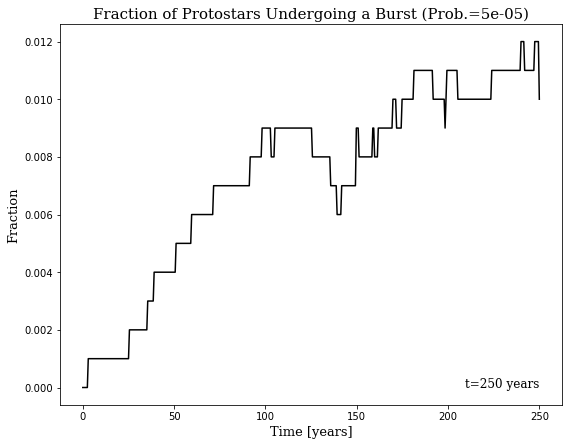

In [10]:
time=np.linspace(0,t,steps)
text="t={} years".format(t)
title='Fraction of Protostars Undergoing a Burst (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/fraction_bursts.jpeg',dpi=300)

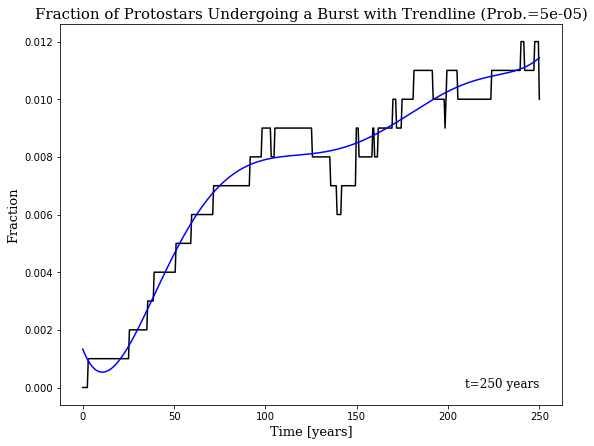

In [11]:
#fit a line to the graph
coef=np.polyfit(time,fraction,6)
poly1d_fn=np.poly1d(coef)
title2='Fraction of Protostars Undergoing a Burst with Trendline (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction,color='black')
ax.plot(time,poly1d_fn(time),color='blue')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title2,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')
plt.savefig('/Users/rachellee/Desktop/fraction_bursts_trend.jpeg',dpi=300)

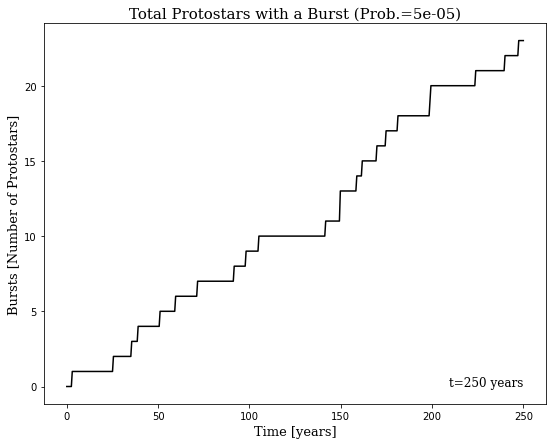

In [12]:
text="t={} years".format(t)
title3='Total Protostars with a Burst (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots()
fig.set_size_inches(9,7)
ax.plot(time,burst_total,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax.set_title(title3,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')
plt.savefig('/Users/rachellee/Desktop/total_bursts.jpeg',dpi=300)

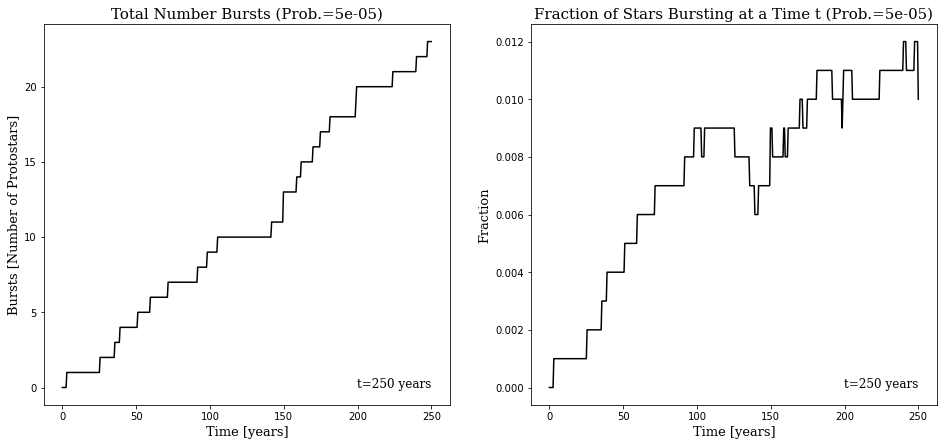

In [13]:
title4='Total Number Bursts (Prob.={})'.format(burst_prob)
title5='Fraction of Stars Bursting at a Time t (Prob.={})'.format(burst_prob)
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(16,7)
ax1.plot(time,burst_total,color='black')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction,color='black')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
ax2.text(t,0,text,font='serif',fontsize=12,ha='right')
plt.savefig('/Users/rachellee/Desktop/comp_bursts_normal.jpeg',dpi=300)

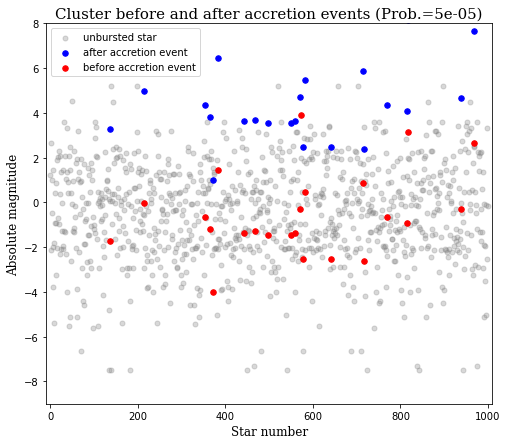

In [14]:
text_comp='Cluster before and after accretion events (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(8,7)
ax.scatter(star,cluster_mag,color='grey',alpha=0.3,s=25,label='unbursted star')
ax.scatter(star_new,cluster_new,color='blue',label='after accretion event',alpha=1,s=30)
ax.scatter(star_old,cluster_old,color='red',label='before accretion event',alpha=1,s=30)
ax.set_xlim(-10,1010)
ax.set_ylim(-9,8)
ax.set_title(text_comp,font='serif',fontsize=15)
ax.set_xlabel('Star number',font='serif',fontsize=12)
ax.set_ylabel('Absolute magnitude',font='serif',fontsize=12)
ax.legend(loc='best')
plt.gca().invert_yaxis()
plt.savefig('/Users/rachellee/Desktop/cluster_view.jpeg',dpi=300)

## Now look at 10x higher probability

In [15]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
burst10m=np.ones((cluster_size,steps))
L10m=np.zeros((cluster_size,steps))

In [16]:
burst_prob10m=burst_prob*10
burst_fraction10m=[]
cluster_new10m=[]
cluster_old10m=[]
star_new10m=[]
star_old10m=[]
bursts10m=0
for i in range(steps):
    for j in range(cluster_size):
        if burst10m[j,i]==1:
            prob=random.random()
            if prob>burst_prob10m:
                burst10m[j,i]=burst10m[j,i]
                L10m[j,i]=cluster_mag[j]
            if prob<=burst_prob10m:
                burst10m[j,i:200+i]=np.nan
                L10m[j,i]=cluster_mag[j]-5
                cluster_new10m.append(cluster_mag[j]-5)
                cluster_old10m.append(cluster_mag[j])
                star_new10m.append(star[j])
                star_old10m.append(star[j])

In [17]:
#determine total number of bursts 
total10m=0
burst_total10m=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst10m[j,i])==True and burst10m[j,i-1]==1:
                total10m+=1
    burst_total10m.append(total10m)

In [18]:
#find the fraction at a time
burst_fraction10m=[]
fraction_val10m=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst10m[j,i])==True:
            fraction_val10m+=1
    burst_fraction10m.append(fraction_val10m)
    fraction_val10m=0

In [19]:
fraction10m=[]
for i in range(len(burst_fraction10m)):
    fraction10m.append(burst_fraction10m[i]/cluster_size)

Text(250, 0, 't=250 years')

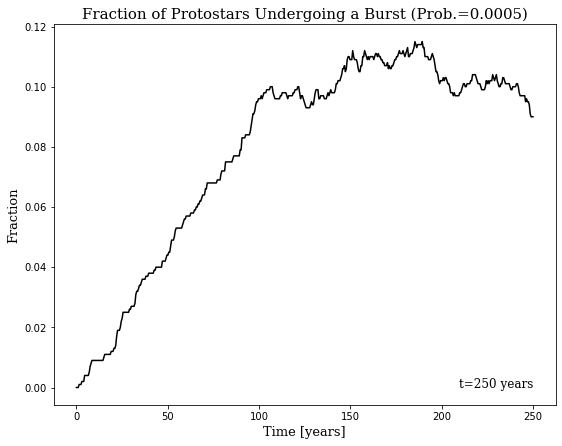

In [20]:
text="t={} years".format(t)
title='Fraction of Protostars Undergoing a Burst (Prob.={})'.format(burst_prob10m)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction10m,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

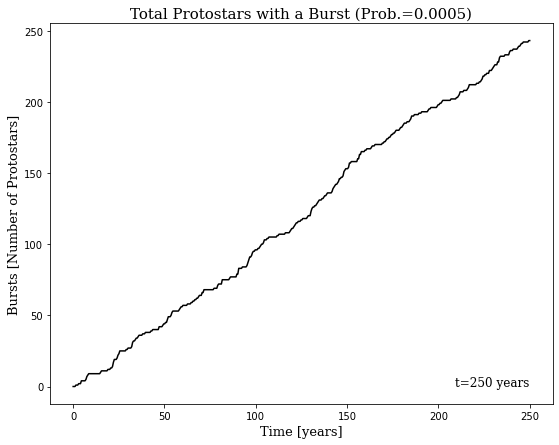

In [21]:
text="t={} years".format(t)
title3='Total Protostars with a Burst (Prob.={})'.format(burst_prob10m)
fig,ax=plt.subplots()
fig.set_size_inches(9,7)
ax.plot(time,burst_total10m,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax.set_title(title3,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

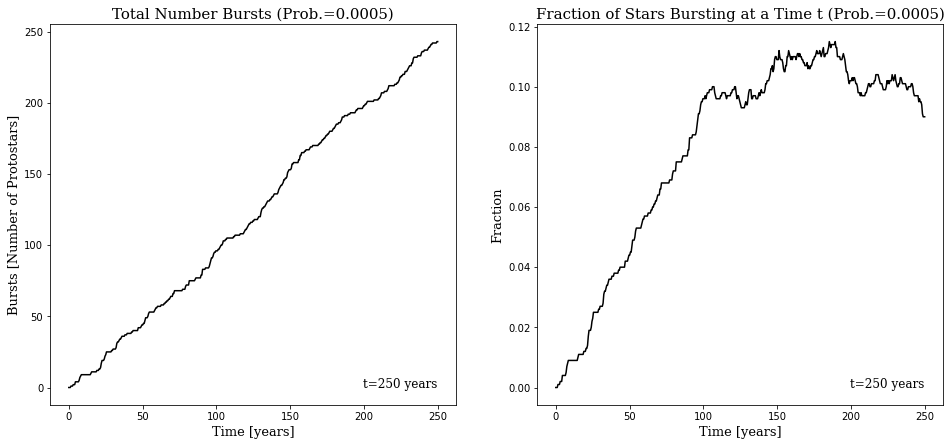

In [22]:
title4='Total Number Bursts (Prob.={})'.format(burst_prob10m)
title5='Fraction of Stars Bursting at a Time t (Prob.={})'.format(burst_prob10m)
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(16,7)
ax1.plot(time,burst_total10m,color='black')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction10m,color='black')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
ax2.text(t,0,text,font='serif',fontsize=12,ha='right')

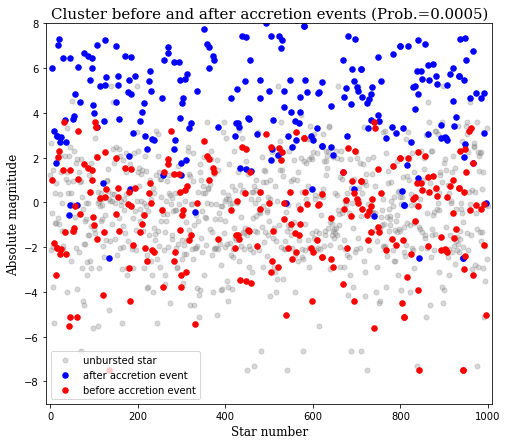

In [23]:
text_comp='Cluster before and after accretion events (Prob.={})'.format(burst_prob10m)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(8,7)
ax.scatter(star,cluster_mag,color='grey',alpha=0.3,s=25,label='unbursted star')
ax.scatter(star_new10m,cluster_new10m,color='blue',label='after accretion event',alpha=1,s=30)
ax.scatter(star_old10m,cluster_old10m,color='red',label='before accretion event',alpha=1,s=30)
ax.set_xlim(-10,1010)
ax.set_ylim(-9,8)
ax.set_title(text_comp,font='serif',fontsize=15)
ax.set_xlabel('Star number',font='serif',fontsize=12)
ax.set_ylabel('Absolute magnitude',font='serif',fontsize=12)
plt.gca().invert_yaxis()
ax.legend(loc='best')

## 10x lower probability

In [24]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
burst10l=np.ones((cluster_size,steps))
L10l=np.zeros((cluster_size,steps))

In [26]:
burst_prob10l=burst_prob/10
burst_fraction10l=[]
cluster_new10l=[]
cluster_old10l=[]
star_new10l=[]
star_old10l=[]
bursts10l=0
for i in range(steps):
    for j in range(cluster_size):
        if burst10l[j,i]==1:
            prob=random.random()
            if prob>burst_prob10l:
                burst10l[j,i]=burst10l[j,i]
                L10l[j,i]=cluster_mag[j]
            if prob<=burst_prob10l:
                burst10l[j,i:200+i]=np.nan
                L10l[j,i]=cluster_mag[j]-5
                cluster_new10l.append(cluster_mag[j]-5)
                cluster_old10l.append(cluster_mag[j])
                star_new10l.append(star[j])
                star_old10l.append(star[j])

In [27]:
#determine total number of bursts 
total10l=0
burst_total10l=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst10l[j,i])==True and burst10l[j,i-1]==1:
                total10l+=1
    burst_total10l.append(total10l)

In [28]:
#find the fraction at a time
burst_fraction10l=[]
fraction_val10l=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst10l[j,i])==True:
            fraction_val10l+=1
    burst_fraction10l.append(fraction_val10l)
    fraction_val10l=0

In [29]:
fraction10l=[]
for i in range(len(burst_fraction10l)):
    fraction10l.append(burst_fraction10l[i]/cluster_size)

Text(250, 0, 't=250 years')

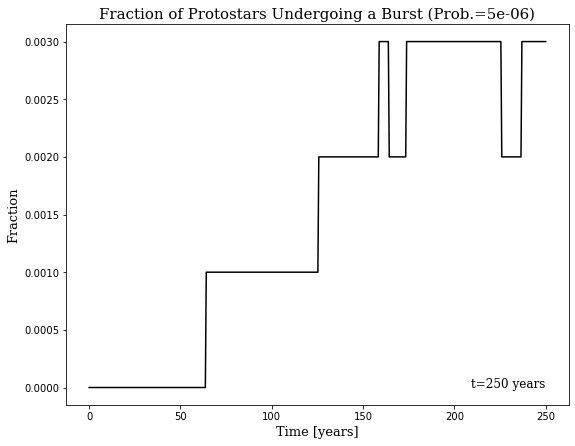

In [30]:
text="t={} years".format(t)
title='Fraction of Protostars Undergoing a Burst (Prob.={})'.format(burst_prob10l)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction10l,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

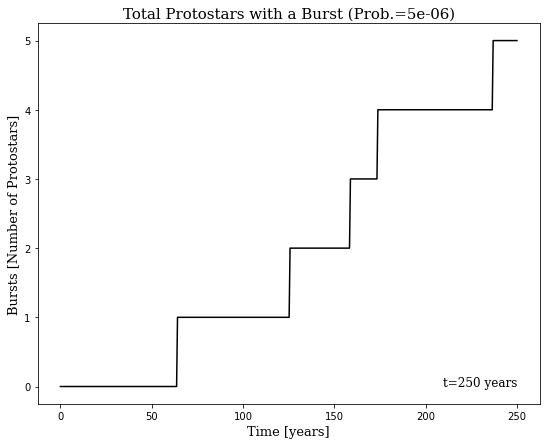

In [31]:
text="t={} years".format(t)
title3='Total Protostars with a Burst (Prob.={})'.format(burst_prob10l)
fig,ax=plt.subplots()
fig.set_size_inches(9,7)
ax.plot(time,burst_total10l,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax.set_title(title3,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

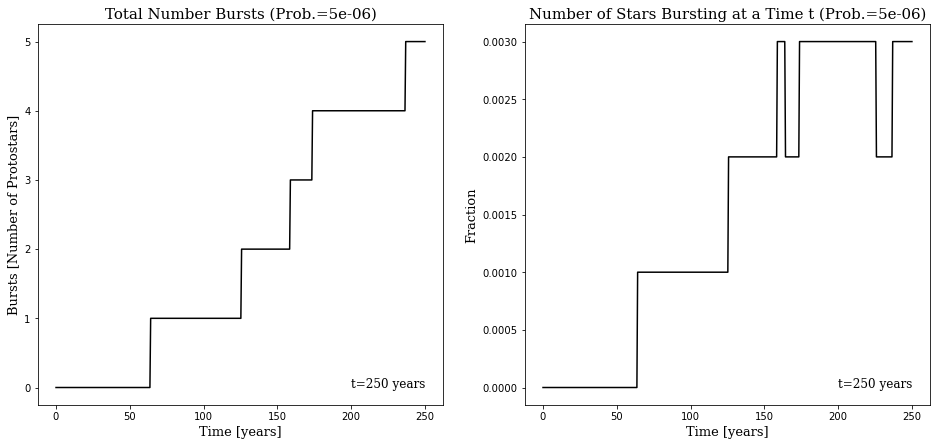

In [32]:
title4='Total Number Bursts (Prob.={})'.format(burst_prob10l)
title5='Number of Stars Bursting at a Time t (Prob.={})'.format(burst_prob10l)
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(16,7)
ax1.plot(time,burst_total10l,color='black')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction10l,color='black')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
ax2.text(t,0,text,font='serif',fontsize=12,ha='right')

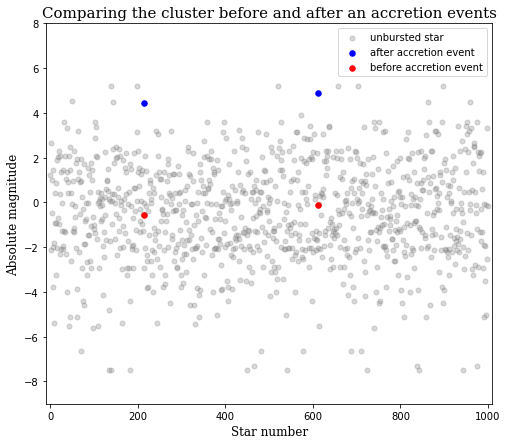

In [33]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(8,7)
ax.scatter(star,cluster_mag,color='grey',alpha=0.3,s=25,label='unbursted star')
ax.scatter(star_new10l,cluster_new10l,color='blue',label='after accretion event',alpha=1,s=30)
ax.scatter(star_old10l,cluster_old10l,color='red',label='before accretion event',alpha=1,s=30)
ax.set_xlim(-10,1010)
ax.set_ylim(-9,8)
ax.set_title('Comparing the cluster before and after an accretion events',font='serif',fontsize=15)
ax.set_xlabel('Star number',font='serif',fontsize=12)
ax.set_ylabel('Absolute magnitude',font='serif',fontsize=12)
plt.gca().invert_yaxis()
ax.legend(loc='best')

## 2x higher

In [34]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
burst2m=np.ones((cluster_size,steps))
L2m=np.zeros((cluster_size,steps))

In [35]:
burst_prob2m=burst_prob*2
burst_fraction2m=[]
cluster_new2m=[]
cluster_old2m=[]
star_new2m=[]
star_old2m=[]
bursts2m=0
for i in range(steps):
    for j in range(cluster_size):
        if burst2m[j,i]==1:
            prob=random.random()
            if prob>burst_prob2m:
                burst2m[j,i]=burst2m[j,i]
                L2m[j,i]=cluster_mag[j]
            if prob<=burst_prob2m:
                burst2m[j,i:200+i]=np.nan
                L2m[j,i]=cluster_mag[j]-5
                cluster_new2m.append(cluster_mag[j]-5)
                cluster_old2m.append(cluster_mag[j])
                star_new2m.append(star[j])
                star_old2m.append(star[j])

In [36]:
#determine total number of bursts 
total2m=0
burst_total2m=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst2m[j,i])==True and burst2m[j,i-1]==1:
                total2m+=1
    burst_total2m.append(total2m)

In [37]:
#find the fraction at a time
burst_fraction2m=[]
fraction_val2m=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst2m[j,i])==True:
            fraction_val2m+=1
    burst_fraction2m.append(fraction_val2m)
    fraction_val2m=0

In [38]:
fraction2m=[]
for i in range(len(burst_fraction2m)):
    fraction2m.append(burst_fraction2m[i]/cluster_size)

Text(250, 0, 't=250 years')

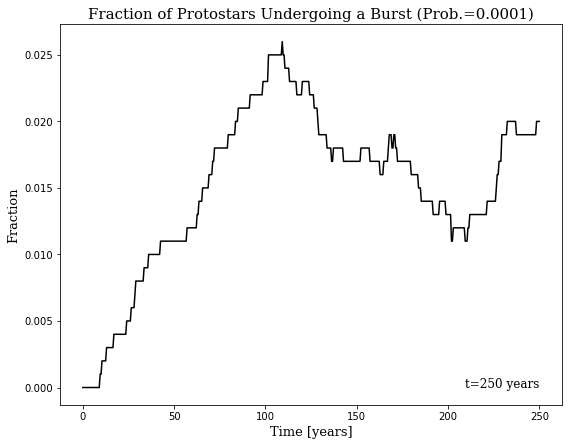

In [39]:
text="t={} years".format(t)
title='Fraction of Protostars Undergoing a Burst (Prob.={})'.format(burst_prob2m)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction2m,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

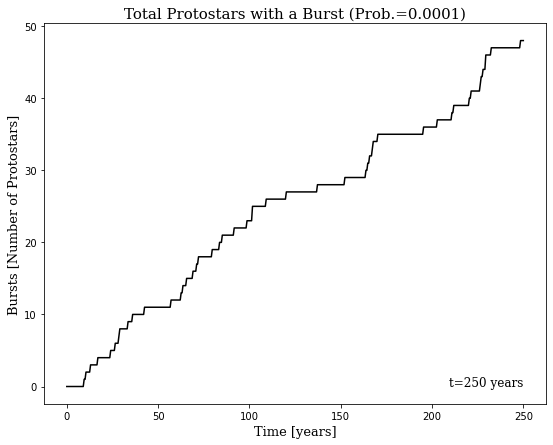

In [40]:
text="t={} years".format(t)
title3='Total Protostars with a Burst (Prob.={})'.format(burst_prob2m)
fig,ax=plt.subplots()
fig.set_size_inches(9,7)
ax.plot(time,burst_total2m,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax.set_title(title3,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

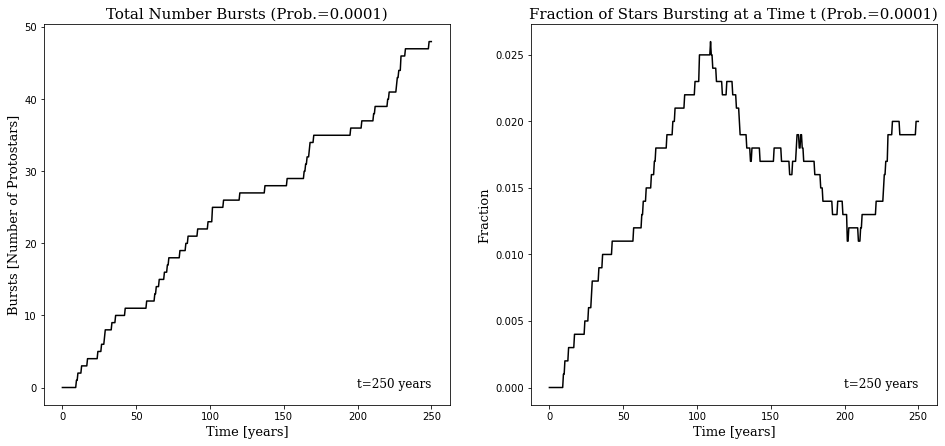

In [41]:
title4='Total Number Bursts (Prob.={})'.format(burst_prob2m)
title5='Fraction of Stars Bursting at a Time t (Prob.={})'.format(burst_prob2m)
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(16,7)
ax1.plot(time,burst_total2m,color='black')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction2m,color='black')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
ax2.text(t,0,text,font='serif',fontsize=12,ha='right')

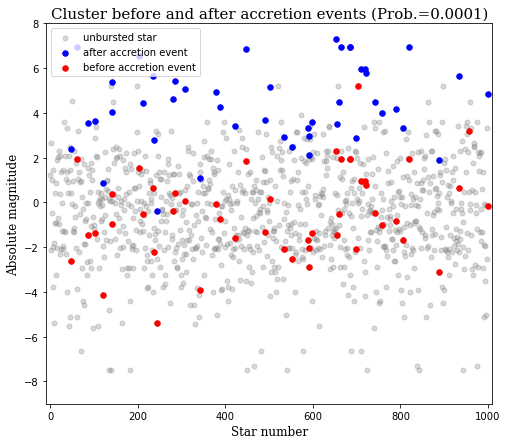

In [42]:
text_comp='Cluster before and after accretion events (Prob.={})'.format(burst_prob2m)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(8,7)
ax.scatter(star,cluster_mag,color='grey',alpha=0.3,s=25,label='unbursted star')
ax.scatter(star_new2m,cluster_new2m,color='blue',label='after accretion event',alpha=1,s=30)
ax.scatter(star_old2m,cluster_old2m,color='red',label='before accretion event',alpha=1,s=30)
ax.set_xlim(-10,1010)
ax.set_ylim(-9,8)
ax.set_title(text_comp,font='serif',fontsize=15)
ax.set_xlabel('Star number',font='serif',fontsize=12)
ax.set_ylabel('Absolute magnitude',font='serif',fontsize=12)
ax.legend(loc='best')
plt.gca().invert_yaxis()

## 2x less

In [43]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
burst2l=np.ones((cluster_size,steps))
L2l=np.zeros((cluster_size,steps))

In [44]:
burst_prob2l=burst_prob/2
burst_fraction2l=[]
cluster_new2l=[]
cluster_old2l=[]
star_new2l=[]
star_old2l=[]
bursts2l=0
for i in range(steps):
    for j in range(cluster_size):
        if burst2l[j,i]==1:
            prob=random.random()
            if prob>burst_prob2l:
                burst2l[j,i]=burst2l[j,i]
                L2l[j,i]=cluster_mag[j]
            if prob<=burst_prob2l:
                burst2l[j,i:200+i]=np.nan
                L2l[j,i]=cluster_mag[j]-5
                cluster_new2l.append(cluster_mag[j]-5)
                cluster_old2l.append(cluster_mag[j])
                star_new2l.append(star[j])
                star_old2l.append(star[j])

In [45]:
#determine total number of bursts 
total2l=0
burst_total2l=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst2l[j,i])==True and burst2l[j,i-1]==1:
                total2l+=1
    burst_total2l.append(total2l)

In [46]:
#find the fraction at a time
burst_fraction2l=[]
fraction_val2l=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst2l[j,i])==True:
            fraction_val2l+=1
    burst_fraction2l.append(fraction_val2l)
    fraction_val2l=0

In [47]:
fraction2l=[]
for i in range(len(burst_fraction2l)):
    fraction2l.append(burst_fraction2l[i]/cluster_size)

Text(250, 0, 't=250 years')

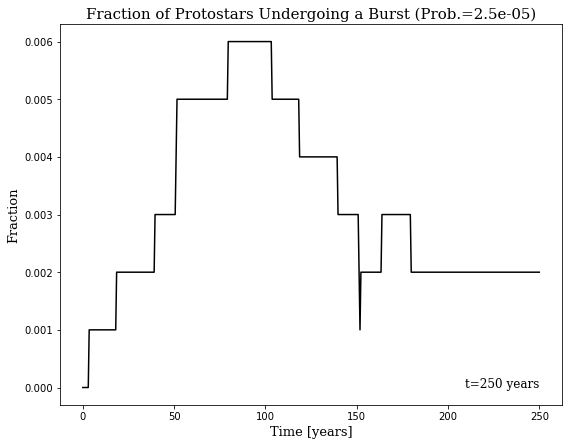

In [48]:
text="t={} years".format(t)
title='Fraction of Protostars Undergoing a Burst (Prob.={})'.format(burst_prob2l)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction2l,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

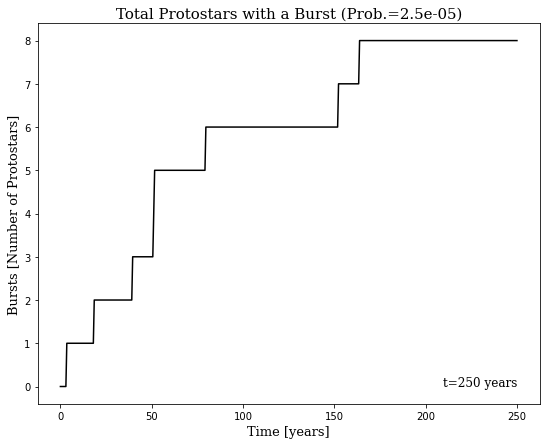

In [49]:
text="t={} years".format(t)
title3='Total Protostars with a Burst (Prob.={})'.format(burst_prob2l)
fig,ax=plt.subplots()
fig.set_size_inches(9,7)
ax.plot(time,burst_total2l,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax.set_title(title3,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')

Text(250, 0, 't=250 years')

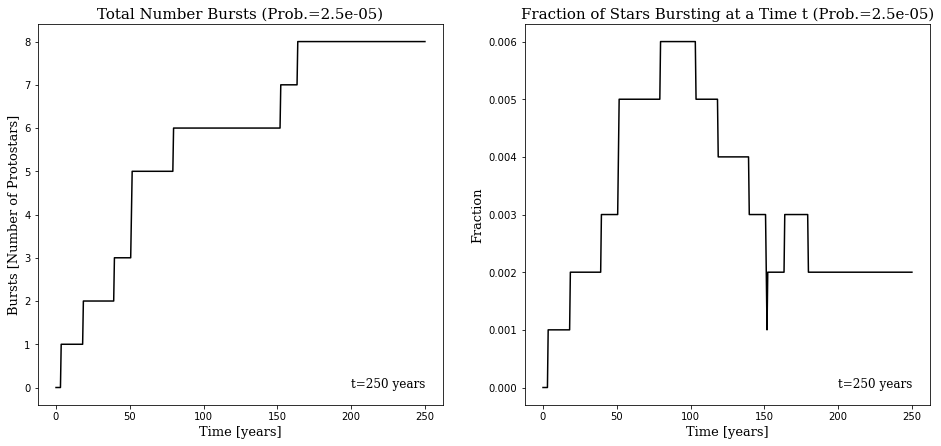

In [50]:
title4='Total Number Bursts (Prob.={})'.format(burst_prob2l)
title5='Fraction of Stars Bursting at a Time t (Prob.={})'.format(burst_prob2l)
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(16,7)
ax1.plot(time,burst_total2l,color='black')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction2l,color='black')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
ax2.text(t,0,text,font='serif',fontsize=12,ha='right')

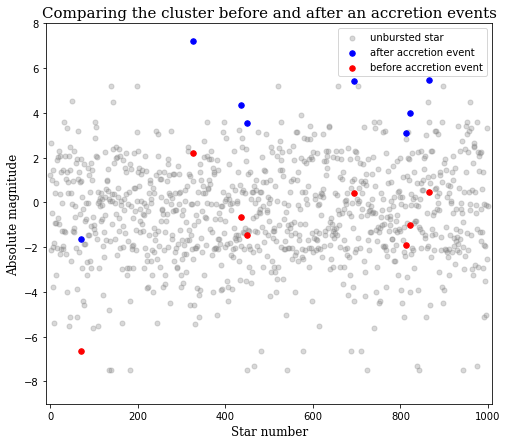

In [51]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(8,7)
ax.scatter(star,cluster_mag,color='grey',alpha=0.3,s=25,label='unbursted star')
ax.scatter(star_new2l,cluster_new2l,color='blue',label='after accretion event',alpha=1,s=30)
ax.scatter(star_old2l,cluster_old2l,color='red',label='before accretion event',alpha=1,s=30)
ax.set_xlim(-10,1010)
ax.set_ylim(-9,8)
ax.set_title('Comparing the cluster before and after an accretion events',font='serif',fontsize=15)
ax.set_xlabel('Star number',font='serif',fontsize=12)
ax.set_ylabel('Absolute magnitude',font='serif',fontsize=12)
ax.legend(loc='best')
plt.gca().invert_yaxis()

## Compare them all

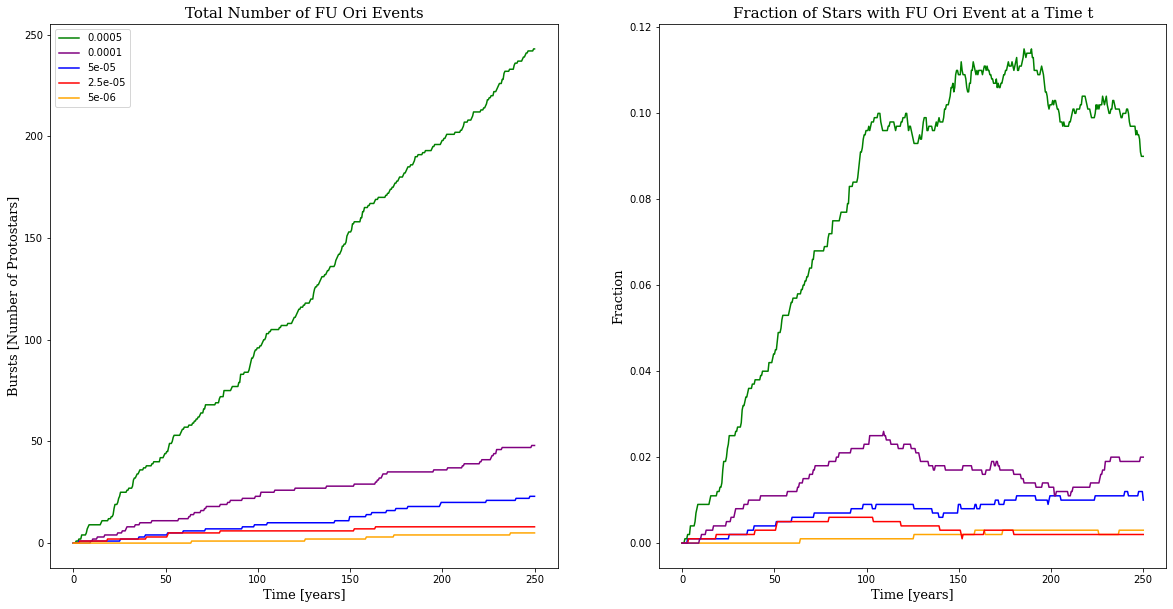

In [52]:
title4='Total Number of FU Ori Events'
title5='Fraction of Stars with FU Ori Event at a Time t'
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(20,10)
ax1.plot(time,burst_total10m,label=burst_prob10m,color='green')
ax1.plot(time,burst_total2m,label=burst_prob2m,color='purple')
ax1.plot(time,burst_total,label=burst_prob,color='blue')
ax1.plot(time,burst_total2l,label=burst_prob2l,color='red')
ax1.plot(time,burst_total10l,label=burst_prob10l,color='orange')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.legend()
#ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction,label=burst_prob,color='blue')
ax2.plot(time,fraction10l,label=burst_prob10l,color='orange')
ax2.plot(time,fraction10m,label=burst_prob10m,color='green')
ax2.plot(time,fraction2l,label=burst_prob2l,color='red')
ax2.plot(time,fraction2m,label=burst_prob2m,color='purple')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
#ax2.text(t,0,text,font='serif',fontsize=12,ha='right')
plt.savefig('/Users/rachellee/Desktop/comp_probs_2.jpeg',dpi=300)

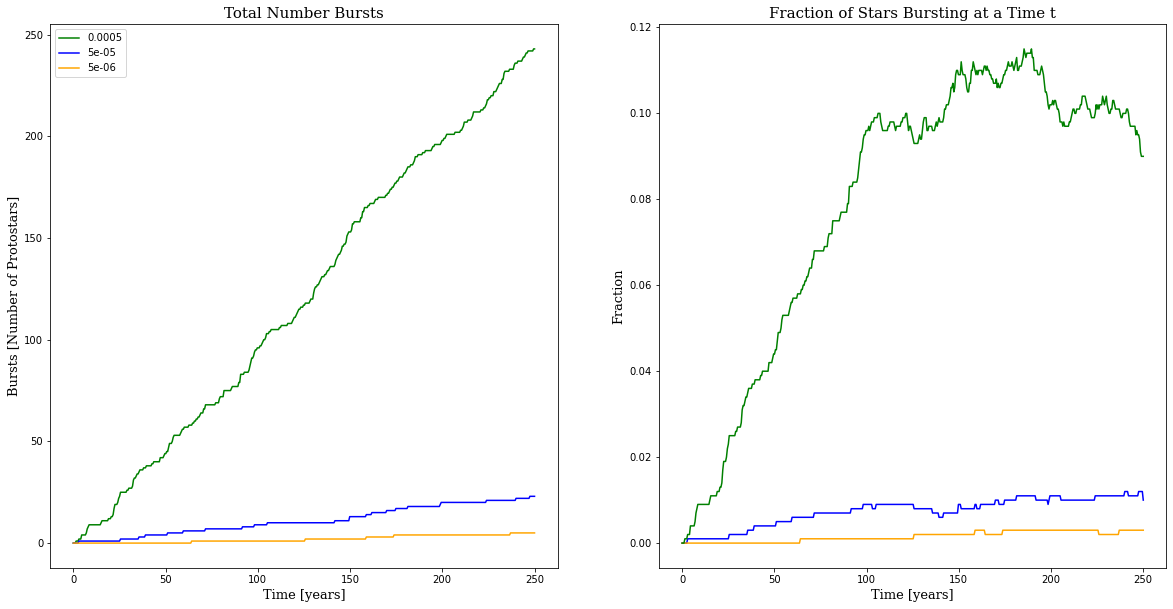

In [53]:
title4='Total Number Bursts'
title5='Fraction of Stars Bursting at a Time t'
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(20,10)
ax1.plot(time,burst_total10m,label=burst_prob10m,color='green')
ax1.plot(time,burst_total,label=burst_prob,color='blue')
ax1.plot(time,burst_total10l,label=burst_prob10l,color='orange')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.legend()
#ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction,label=burst_prob,color='blue')
ax2.plot(time,fraction10l,label=burst_prob10l,color='orange')
ax2.plot(time,fraction10m,label=burst_prob10m,color='green')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
#ax2.text(t,0,text,font='serif',fontsize=12,ha='right')
plt.savefig('/Users/rachellee/Desktop/comp_probs10.jpeg',dpi=300)

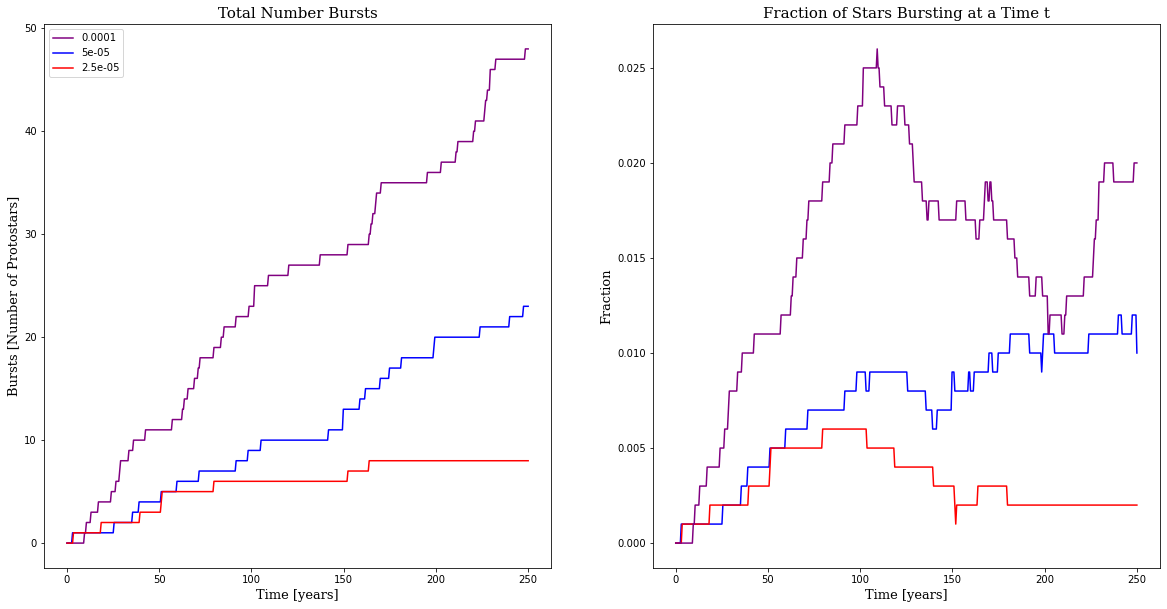

In [54]:
title4='Total Number Bursts'
title5='Fraction of Stars Bursting at a Time t'
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(20,10)
ax1.plot(time,burst_total2m,label=burst_prob2m,color='purple')
ax1.plot(time,burst_total,label=burst_prob,color='blue')
ax1.plot(time,burst_total2l,label=burst_prob2l,color='red')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.legend()
#ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction,label=burst_prob,color='blue')
ax2.plot(time,fraction2l,label=burst_prob2l,color='red')
ax2.plot(time,fraction2m,label=burst_prob2m,color='purple')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
#ax2.text(t,0,text,font='serif',fontsize=12,ha='right')
plt.savefig('/Users/rachellee/Desktop/comp_probs2.jpeg',dpi=300)

# Calculate mean and standard deviation for observation times

In [55]:
#first observation at t=200 years
#PRIMA starts 20 years later and observes once every 6 months for 5 years
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]
t_fraction=[]
t_fraction2m=[]
t_fraction2l=[]
t_fraction10m=[]
t_fraction10l=[]
for i in t_list_cadence:
    t_fraction10m.append(fraction10m[i])
    t_fraction10l.append(fraction10l[i])
    t_fraction2m.append(fraction2m[i])
    t_fraction.append(fraction[i])
    t_fraction2l.append(fraction2l[i])

In [56]:
normal_mean=np.mean(t_fraction)
normal_std=np.std(t_fraction)
mean_10m=np.mean(t_fraction10m)
std10m=np.std(t_fraction10m)
mean_10l=np.mean(t_fraction10l)
std10l=np.std(t_fraction10l)
mean_2m=np.mean(t_fraction2m)
std2m=np.std(t_fraction2m)
mean_2l=np.mean(t_fraction2l)
std2l=np.std(t_fraction2l)

mean=[normal_mean,mean_10m,mean_10l,mean_2m,mean_2l]
std=[normal_std,std10m,std10l,std2m,std2l]
probability=[burst_prob,burst_prob10m,burst_prob10l,burst_prob2m,burst_prob2l]

In [57]:
print(mean,std)

[0.010416666666666664, 0.10041666666666667, 0.0030000000000000005, 0.013750000000000004, 0.0020000000000000005] [0.0004930066485916342, 0.0011873172373979136, 4.336808689942018e-19, 0.00043301270189221973, 4.336808689942018e-19]


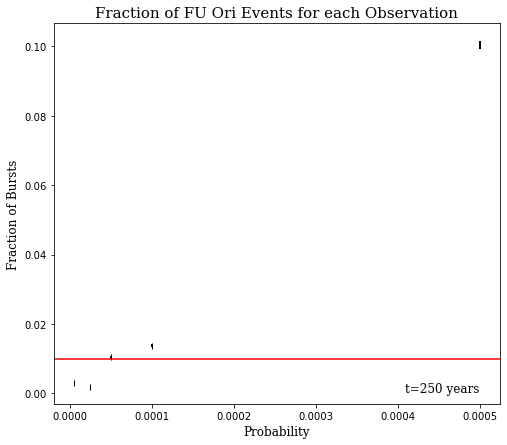

In [58]:
fig,ax=plt.subplots()
fig.set_size_inches(8,7)
ax.errorbar(probability,mean,yerr=std,fmt='|',color='black',ecolor='black',elinewidth=2)
ax.text(0.0005,0.0005,text,font='serif',fontsize=12,ha='right')
ax.axhline(0.01,color='red')
ax.set_xlabel('Probability',font='serif',fontsize=12)
ax.set_ylabel('Fraction of Bursts',font='serif',fontsize=12)
ax.set_title('Fraction of FU Ori Events for each Observation',font='serif',fontsize=15)
plt.savefig('/Users/rachellee/Desktop/10Run_ProbChange.jpeg',dpi=300)

In [59]:
print('You should see',np.round(normal_mean,2),'\u00B1',np.round(normal_std,2),'bursts with each observation when \
the probability is',burst_prob)
print('You should see',np.round(mean_10m,2),'\u00B1',np.round(std10m,2),'bursts with each observation when \
the probability is',burst_prob10m)
print('You should see',np.round(mean_10l,2),'\u00B1',np.round(std10l,2),'bursts with each observation when \
the probability is',burst_prob10l)
print('You should see',np.round(mean_2m,2),'\u00B1',np.round(std2m,2),'bursts with each observation when \
the probability is',burst_prob2m)
print('You should see',np.round(mean_2l,2),'\u00B1',np.round(std2l,2),'bursts with each observation when \
the probability is',burst_prob2l)

You should see 0.01 ± 0.0 bursts with each observation when the probability is 5e-05
You should see 0.1 ± 0.0 bursts with each observation when the probability is 0.0005
You should see 0.0 ± 0.0 bursts with each observation when the probability is 5e-06
You should see 0.01 ± 0.0 bursts with each observation when the probability is 0.0001
You should see 0.0 ± 0.0 bursts with each observation when the probability is 2.5e-05


In [60]:
from tabulate import tabulate
table=[['Probability','Mean fraction of bursts','Standard deviation'],
      [burst_prob,np.round(normal_mean,4),np.round(normal_std,4)],
      [burst_prob10m,np.round(mean_10m,4),np.round(std10m,4)],
      [burst_prob10l,np.round(mean_10l,4),np.round(std10l,4)],
      [burst_prob2m,np.round(mean_2m,4),np.round(std2m,4)],
      [burst_prob2l,np.round(mean_2l,4),np.round(std2l,4)]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid',numalign='center'))

╒═══════════════╤═══════════════════════════╤══════════════════════╕
│  Probability  │  Mean fraction of bursts  │  Standard deviation  │
╞═══════════════╪═══════════════════════════╪══════════════════════╡
│     5e-05     │          0.0104           │        0.0005        │
├───────────────┼───────────────────────────┼──────────────────────┤
│    0.0005     │          0.1004           │        0.0012        │
├───────────────┼───────────────────────────┼──────────────────────┤
│     5e-06     │           0.003           │          0           │
├───────────────┼───────────────────────────┼──────────────────────┤
│    0.0001     │          0.0138           │        0.0004        │
├───────────────┼───────────────────────────┼──────────────────────┤
│    2.5e-05    │           0.002           │          0           │
╘═══════════════╧═══════════════════════════╧══════════════════════╛
